In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from copy import deepcopy

In [3]:
path_data = "./data/icr-identify-age-related-conditions/"
data = pd.read_csv(path_data + "train.csv")

In [4]:
data.dtypes

Id        object
AB       float64
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EJ        object
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
Class      int64
dtype: object

In [5]:
# Check number of missing values
for type,ind in zip(data.dtypes,data.dtypes.index): 
    if type == "object": 
        print(f"Columns: {ind} -- Missing val: {type}")
    elif type == "int64":
        print(f"Columns: {ind} -- Missing val: {type}")
print("Rest are float64")

Columns: Id -- Missing val: object
Columns: EJ -- Missing val: object
Columns: Class -- Missing val: int64
Rest are float64


In [6]:
# Checking data distribution
data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [7]:
# Check number of missing values
for miss_val,ind in zip(data.isna().sum(),data.isna().sum().index): 
    if miss_val > 0: 
        print(f"Columns: {ind} -- Missing val: {miss_val}")

print(f"Total number of rows are {data.shape}")

Columns: BQ -- Missing val: 60
Columns: CB -- Missing val: 2
Columns: CC -- Missing val: 3
Columns: DU -- Missing val: 1
Columns: EL -- Missing val: 60
Columns: FC -- Missing val: 1
Columns: FL -- Missing val: 1
Columns: FS -- Missing val: 2
Columns: GL -- Missing val: 1
Total number of rows are (617, 58)


In [8]:
# Checking distribution of data for each class 
# Class 0 
data_class_0 = data.loc[data.Class == 0]
print(f"Class 0 size: {data_class_0.shape}")

# Class 1 
data_class_1 = data.loc[data.Class == 1]
print(f"Class 1 size: {data_class_1.shape}")

Class 0 size: (509, 58)
Class 1 size: (108, 58)


## Handling missing values

### BQ

In [9]:
# All id in missing bq are also not found in the ones without missing bq
id_missing_bq = data.loc[data.BQ.isna()].Id
id_non_missing_bq = list(data.loc[~data.BQ.isna()].Id)

matching_id_bq = []
for id in id_missing_bq: 
    if id in id_non_missing_bq: matching_id_bq.append(id)
matching_id_bq

[]

In [10]:
# Only have class 0
data.loc[data.BQ.isna()].Class.unique()

array([0], dtype=int64)

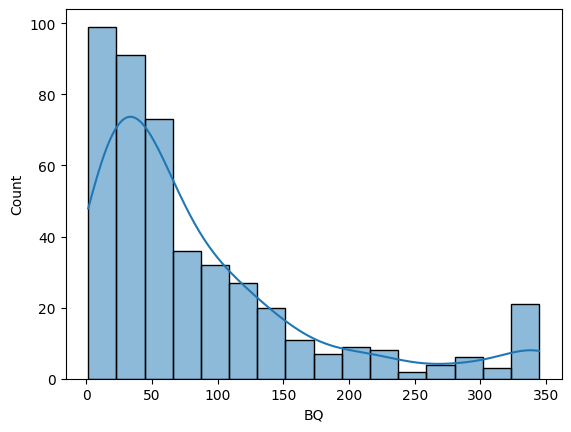

In [11]:
# Imputate with the mean?
sns.histplot(data=data_class_0,x="BQ", kde= True)
data_class_0.describe().BQ
data_class_0_mean = data_class_0.describe().BQ["mean"]
data.BQ.fillna(data_class_0_mean,inplace=True)

### EL

In [12]:
# All id in missing bq are also not found in the ones without missing bq
id_missing_el = data.loc[data.EL.isna()].Id
id_non_missing_el = list(data.loc[~data.EL.isna()].Id)

matching_id_el = []
for id in id_missing_el: 
    if id in id_non_missing_el: matching_id_el.append(id)
matching_id_el

[]

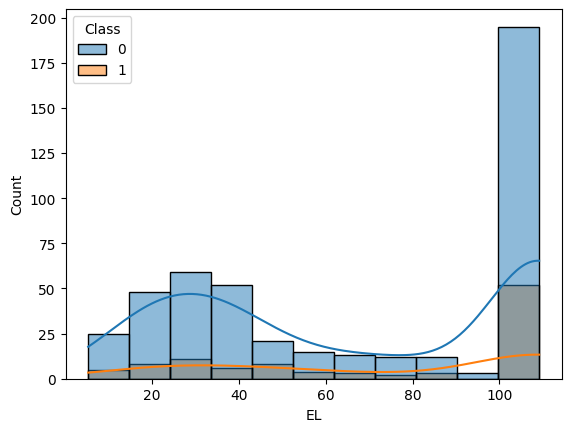

In [13]:
# Only have class 0
from scipy import stats
data_EL_stat_test = data[["EL","Class"]].dropna(axis = 0)

# Change to box cox. 
data_EL_stat_test["EL_BOX"] = stats.boxcox(data_EL_stat_test.EL)[0]
sns.histplot(data=data_EL_stat_test,x="EL", kde= True,hue = "Class")

EL_mode = data.EL.mode().iloc[0]
data.EL.fillna(EL_mode,inplace=True)

### Other missing values

In [14]:
for miss_val,ind in zip(data.isna().sum(),data.isna().sum().index): 
    if miss_val > 0: 
        print(f"Columns: {ind} -- Missing val: {miss_val}")
        # Fill missing value with the mean
        data[ind].fillna(data[ind].mean(),inplace = True)

# Check after imputing
for miss_val,ind in zip(data.isna().sum(),data.isna().sum().index): 
    if miss_val > 0: 
        print(f"Columns: {ind} -- Missing val: {miss_val}")

Columns: CB -- Missing val: 2
Columns: CC -- Missing val: 3
Columns: DU -- Missing val: 1
Columns: FC -- Missing val: 1
Columns: FL -- Missing val: 1
Columns: FS -- Missing val: 2
Columns: GL -- Missing val: 1


### Feature Engineering

#### Using Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [16]:
data_feature_selection_X = data.drop(["Id","Class"],axis = 1) 
data_feature_selection_y = data.Class

LabEncoder = LabelEncoder()
data_feature_selection_X.EJ = LabEncoder.fit_transform(data_feature_selection_X.EJ)

feature_selection_forest = RandomForestClassifier()
feature_selection_forest.fit(data_feature_selection_X,data_feature_selection_y)
forest_feature_importance_score = feature_selection_forest.feature_importances_

forest_feature_importance = pd.DataFrame({"feature": data_feature_selection_X.columns,
              "feature_score": forest_feature_importance_score,
              }).sort_values(ascending = False, by="feature_score")

forest_feature_importance.iloc[0:int(0.2*data_feature_selection_X.shape[1])]

,feature,feature_score
32,DU,0.134976
25,DA,0.046726
21,CR,0.046689
47,FL,0.041186
29,DI,0.036325
55,GL,0.031824
0,AB,0.030487
12,BQ,0.029109
8,BC,0.028250
48,FR,0.028016


#### Correlation Score

In [26]:
LabEncoder = LabelEncoder()
data_corr = deepcopy(data)
data_corr.EJ = LabEncoder.fit_transform(data_corr.EJ)
data_corr = data_corr.drop(["Id"],axis = 1)
correlation_scores = data_corr.corr()["Class"]
correlation_scores.sort_values(ascending = False)[:11]

Class    1.000000
AF       0.302638
BQ       0.284264
AB       0.280612
DU       0.260955
DI       0.260760
FL       0.244143
AM       0.239170
FE       0.216359
BN       0.198283
EH       0.179855
Name: Class, dtype: float64

In [ ]:
# 32	DU 	0.134976  ok
# 25	DA	0.046726  
# 21	CR	0.046689  
# 47	FL	0.041186  ok 
# 29	DI	0.036325  ok
# 55	GL	0.031824
# 0	AB	0.030487
# 12	BQ	0.029109  ok
# 8	BC	0.028250  
# 48	FR	0.028016  
# 26	DE	0.027331  ok

# AF       0.302638
# BQ       0.284264
# AB       0.280612
# DU       0.260955
# DI       0.260760
# FL       0.244143
# AM       0.239170
# FE       0.216359
# BN       0.198283
# EH       0.179855

## Building in Model

In [28]:
test_data = pd.read_csv(path_data + "test.csv")
test_data

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(data_feature_selection_X, data_feature_selection_y, test_size=0.2, random_state=42, stratify = data_feature_selection_y)

In [37]:
data_feature_selection_y[data_feature_selection_y == 0].shape, data_feature_selection_y[data_feature_selection_y == 1].shape

((509,), (108,))